In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
import numpy as np
import pandas as pd
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['label']=iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [ ]:
iris_df["label"].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

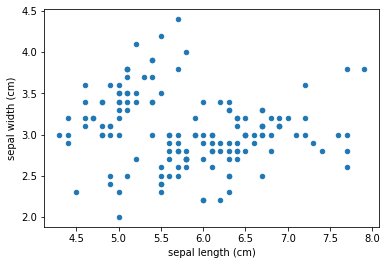

In [ ]:
iris_df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

In [ ]:
from sklearn.model_selection import train_test_split

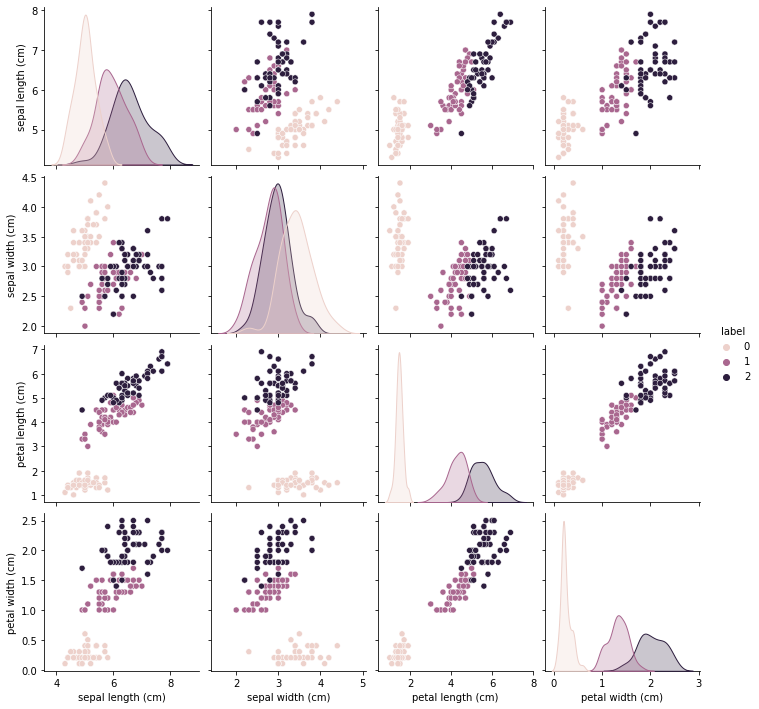

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
iris_ns = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
sns.pairplot(iris_df, vars = iris_ns, hue = 'label')

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(iris_df, iris.target, test_size = 0.2, stratify= iris.target )

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [ ]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]



--- Logistic Regression Classifier ---
1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

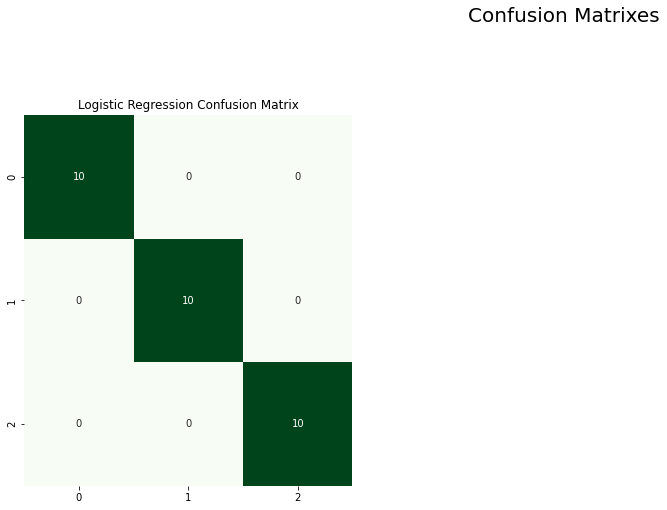

In [ ]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, y_train)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

cm_lr = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, y_train)
pred = rf_clf.predict(test_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [ ]:
print ("\n--- KNN ---")
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, y_train)
pred = kn.predict(test_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- KNN ---
1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
